In [6]:
pip install pretty_midi numpy scikit-learn tensorflow

Note: you may need to restart the kernel to use updated packages.


c:\Users\fenn3\anaconda3\Lib\site-packages\pretty_midi\pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


Loaded 179 MIDI files. Shape: (179, 100, 128, 1)
Classes: ['Bach' 'Beethoven' 'Chopin' 'Mozart']


c:\Users\fenn3\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 98, 126, 32)    │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 49, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 47, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 23, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 44160)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │     2,826,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,845,380 (10.85 MB)

 Trainable params: 2,845,380 (10.85 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.2795 - loss: 14.6833 - val_accuracy: 0.1667 - val_loss: 2.2944
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5614 - loss: 1.0936 - val_accuracy: 0.3889 - val_loss: 1.5234
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8698 - loss: 0.6744 - val_accuracy: 0.4444 - val_loss: 1.6731
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9537 - loss: 0.3023 - val_accuracy: 0.5278 - val_loss: 2.0499
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9573 - loss: 0.1104 - val_accuracy: 0.4444 - val_loss: 2.5655
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9697 - loss: 0.0735 - val_accuracy: 0.3889 - val_loss: 3.4392
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9712 - loss: 0.0678 - val_accuracy: 0.3889 - val_loss: 3.1227
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9555 - loss: 0.0864 - val_accuracy: 0.4722 - 

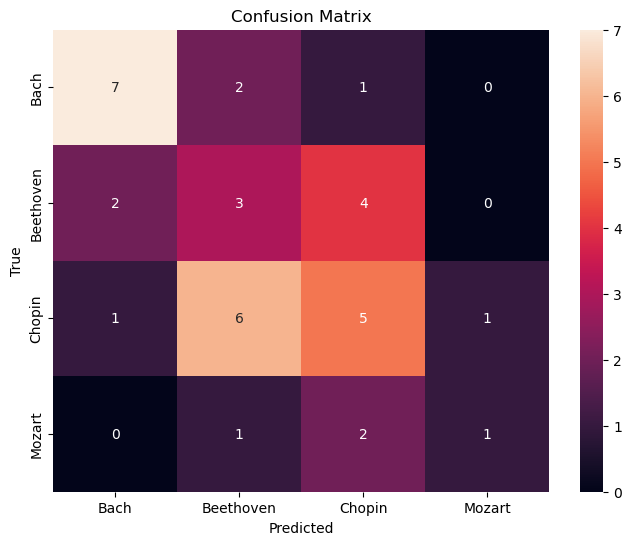

In [8]:
import os
import numpy as np
import pretty_midi
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# ========== CONFIG ==========
MIDI_FOLDER = r"E:\Neural Networks\Final\aai-511-final-project-main\data\test"
FIXED_HEIGHT = 128  # MIDI pitch range (pitches 0–127)
FIXED_WIDTH = 100   # number of time steps
TIME_RESOLUTION = 0.05  # seconds per time step
# ============================

def midi_to_piano_roll(file_path):
    try:
        midi = pretty_midi.PrettyMIDI(file_path)
        piano_roll = midi.get_piano_roll(fs=int(1 / TIME_RESOLUTION))
        
        # Crop to 128 pitches and FIXED_WIDTH time steps
        roll = piano_roll[:FIXED_HEIGHT, :FIXED_WIDTH]
        padded = np.zeros((FIXED_HEIGHT, FIXED_WIDTH))
        padded[:roll.shape[0], :roll.shape[1]] = roll
        return padded.T  # Transpose to (time, pitch)
    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        return None

# --- Load all MIDI files ---
X, y = [], []

for composer in os.listdir(MIDI_FOLDER):
    composer_path = os.path.join(MIDI_FOLDER, composer)
    if os.path.isdir(composer_path):
        for file in os.listdir(composer_path):
            if file.endswith(".mid") or file.endswith(".midi"):
                full_path = os.path.join(composer_path, file)
                roll = midi_to_piano_roll(full_path)
                if roll is not None:
                    X.append(roll)
                    y.append(composer)

X = np.array(X)[..., np.newaxis]
print(f"Loaded {len(X)} MIDI files. Shape: {X.shape}")

# --- Encode composer labels ---
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_cat = to_categorical(y_encoded)
print("Classes:", label_encoder.classes_)

# --- Split dataset ---
X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.2, random_state=42)

# --- Build CNN Model ---
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(FIXED_WIDTH, FIXED_HEIGHT, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(y_cat.shape[1], activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# --- Train the model ---
model.fit(X_train, y_train, epochs=10, batch_size=8, validation_data=(X_test, y_test))

from sklearn.metrics import classification_report, confusion_matrix

# --- Predict on test set ---
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

# --- Generate classification report ---
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=label_encoder.classes_))

# --- Optional: Confusion Matrix ---
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

